# 
#### El conjunto de datos MNIST es un clásico en el aprendizaje profundo y se considera el "Hello World" del Deep Learning. Este dataset consiste en imágenes en escala de grises de 28 × 28 píxeles, cada una representando un número escrito a mano entre 0 y 9.

#### El objetivo es entrenar una red neuronal para clasificar correctamente estos dígitos.

#### El conjunto de datos contiene:

- #### 60,000 imágenes de entrenamiento con sus respectivas etiquetas.
- #### 10,000 imágenes de prueba para evaluar el rendimiento del modelo.
  
#### Cada imagen está representada por una matriz de 28x28 con valores de píxeles entre 0 y 255 (intensidad de color en escala de grises), y cada imagen está etiquetada con su número correspondiente.

## Importar librerías

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

## Cargar y explorar el dataset

Dimensiones de x_train: (60000, 28, 28)
Dimensiones de x_test: (10000, 28, 28)


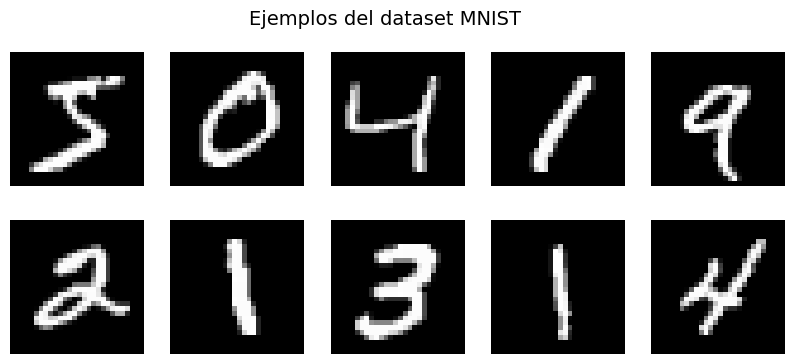

In [3]:
# Cargar el dataset MNIST
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mostrar información básica del dataset
print(f"Dimensiones de x_train: {x_train.shape}")  # (60000, 28, 28)
print(f"Dimensiones de x_test: {x_test.shape}")  # (10000, 28, 28)

# Visualizar algunas imágenes de dígitos
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Ejemplos del dataset MNIST", fontsize=14)
plt.show()


## Procesamiento de los datos

In [4]:
# Normalizar los valores de los píxeles (de 0-255 a 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


## Definir el modelo de Red Neuronal

In [15]:
# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convertir la imagen en un vector
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    keras.layers.Dropout(0.2),  # Regularización para evitar sobreajuste
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el modelo

In [16]:
start = time.time()

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

finish = time.time()
print(f"\nTiempo de entrenamiento: {finish - start:.2f} segundos")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step - accuracy: 0.8621 - loss: 0.4809 - val_accuracy: 0.9566 - val_loss: 0.1471
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.9573 - loss: 0.1480 - val_accuracy: 0.9692 - val_loss: 0.1025
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.9680 - loss: 0.1067 - val_accuracy: 0.9729 - val_loss: 0.0873
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.9727 - loss: 0.0866 - val_accuracy: 0.9745 - val_loss: 0.0804
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.9771 - loss: 0.0701 - val_accuracy: 0.9776 - val_loss: 0.0724
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9797 - loss: 0.0616 - val_accuracy: 0.9789 - val_loss: 0.0743
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.9824 - loss: 0.0557 - val_accuracy: 0.9788 - val_loss: 0.0711
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.9828 -

## Evaluar el modelo

313/313 - 0s - 524us/step - accuracy: 0.9798 - loss: 0.0670

Precisión en test: 0.9798


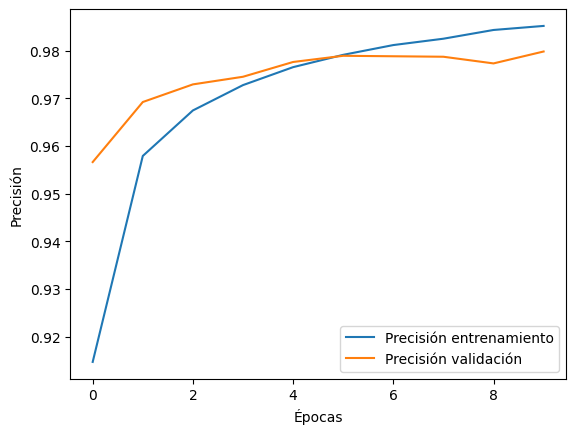

In [17]:
# Evaluar el modelo con datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


# Mostrar precisión del modelo
print(f"\nPrecisión en test: {test_acc:.4f}")

# Graficar la evolución del entrenamiento
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()



## Matriz de confusión y reporte de clasificación

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


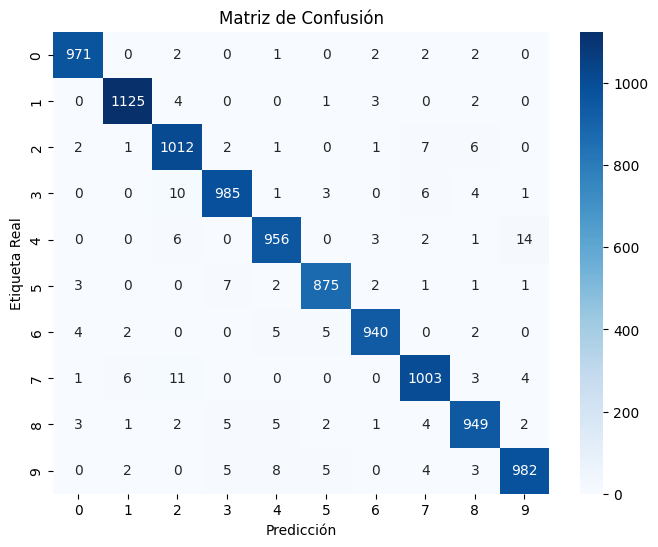


Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [21]:
# Generar predicciones en el conjunto de prueba
y_pred = np.argmax(model.predict(x_test), axis=1)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - accuracy: 0.8561 - loss: 0.4909 - val_accuracy: 0.9589 - val_loss: 0.1373
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.9534 - loss: 0.1557 - val_accuracy: 0.9673 - val_loss: 0.1088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.9668 - loss: 0.1113 - val_accuracy: 0.9715 - val_loss: 0.0898
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.9724 - loss: 0.0894 - val_accuracy: 0.9745 - val_loss: 0.0830
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.9767 - loss: 0.0716 - val_accuracy: 0.9761 - val_loss: 0.0773
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.9793 - loss: 0.0641 - val_accuracy: 0.9781 - val_loss: 0.0741
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.9823 - loss: 0.0546 - val_accuracy: 0.9785 - val_loss: 0.0746
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.9832 -

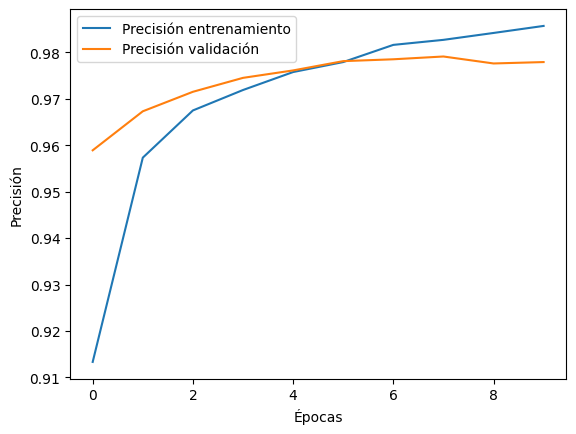

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# Cargar el dataset MNIST
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de los píxeles (de 0-255 a 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convertir la imagen en un vector
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    keras.layers.Dropout(0.2),  # Regularización para evitar sobreajuste
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

finish = time.time()
print(f"Tiempo de entrenamiento: {finish-start}")
# Evaluar el modelo con datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


# Mostrar precisión del modelo
print(f"\nPrecisión en test: {test_acc:.4f}")

# Graficar la evolución del entrenamiento
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


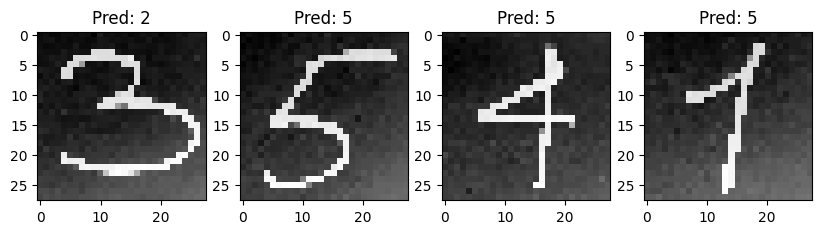

[[0.21568628 0.24313726 0.22352941 0.20784314 0.21960784 0.20784314
  0.22745098 0.26666668 0.20784314 0.2627451  0.26666668 0.24705882
  0.27450982 0.23529412 0.31764707 0.25882354 0.25490198 0.2627451
  0.26666668 0.26666668 0.25490198 0.2627451  0.27058825 0.2509804
  0.26666668 0.28235295 0.29411766 0.29803923]
 [0.23137255 0.20392157 0.22352941 0.21568628 0.23137255 0.21176471
  0.21960784 0.24705882 0.26666668 0.25882354 0.2509804  0.23137255
  0.2627451  0.25882354 0.28235295 0.25490198 0.22352941 0.27058825
  0.28627452 0.25882354 0.25490198 0.24313726 0.2784314  0.26666668
  0.2784314  0.29411766 0.3019608  0.30588236]
 [0.19607843 0.22745098 0.21960784 0.21176471 0.24313726 0.21960784
  0.24705882 0.27058825 0.23137255 0.22745098 0.28235295 0.2901961
  0.2509804  0.2901961  0.2901961  0.25490198 0.3254902  0.2784314
  0.24705882 0.25882354 0.24313726 0.30980393 0.26666668 0.29411766
  0.28627452 0.31764707 0.33333334 0.32941177]
 [0.22352941 0.24705882 0.22745098 0.25490198 0

In [52]:
# Ruta donde están las imágenes procesadas
carpeta_imagenes = "imagenes_procesadas"

# Obtener todas las imágenes .npy en la carpeta
archivos = [f for f in os.listdir(carpeta_imagenes) if f.endswith(".npy")]

# Lista para almacenar imágenes cargadas
imagenes = []

# Cargar todas las imágenes y asegurarse de que tengan la forma correcta
for archivo in archivos:
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)
    imagen = np.load(ruta_imagen)
    
    # Ajustar la forma de cada imagen
    if len(imagen.shape) == 4:  
        imagen = np.squeeze(imagen, axis=-1)  # Quitar canal extra
    if len(imagen.shape) == 3:
        imagen = np.squeeze(imagen, axis=0)  # Quitar batch extra
    
    # Agregar dimensión de batch para cada imagen
    imagen = np.expand_dims(imagen, axis=0)  # Ahora tiene (1,28,28)
    
    # Agregar imagen a la lista
    imagenes.append(imagen)

# Convertir lista a un array numpy (forma final: (n,28,28))
imagenes = np.vstack(imagenes)

# Hacer predicciones para todas las imágenes
predicciones = np.argmax(model.predict(imagenes), axis=1)

# Mostrar las imágenes con sus predicciones
fig, axes = plt.subplots(1, len(imagenes), figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(imagenes[i], cmap="gray")
    ax.set_title(f"Pred: {predicciones[i]}")

plt.show()

print(imagenes[1])

